Q.Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

Salary_hike -> Build a prediction model for Salary_hike

In [9]:
#Import Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
#import Data set
df=pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## EDA and Data Visualizations

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [12]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [13]:
df[df.duplicated()].shape

(0, 2)

In [14]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


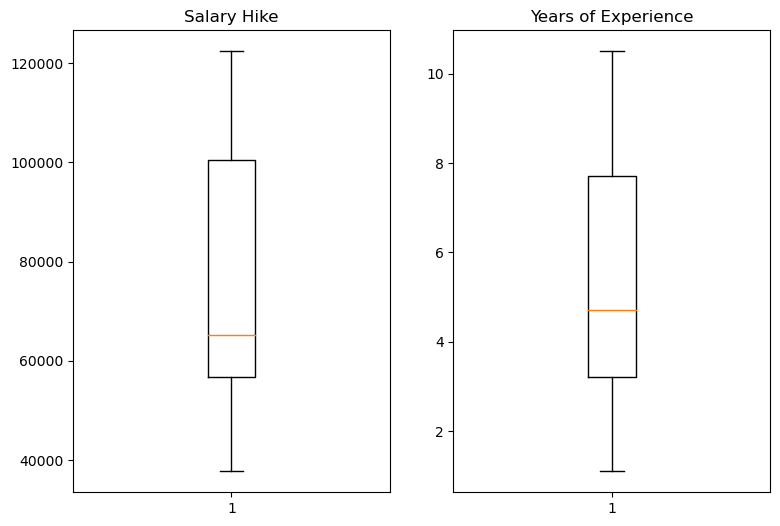

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')
plt.show()

In [16]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

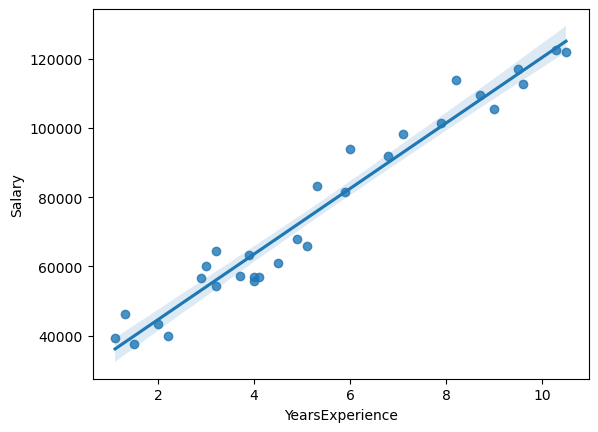

In [17]:
sns.regplot(x=df['YearsExperience'],y=df['Salary']) 

In [18]:
df.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

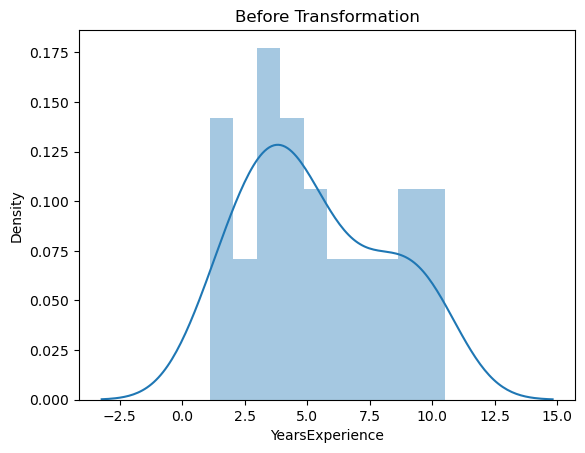

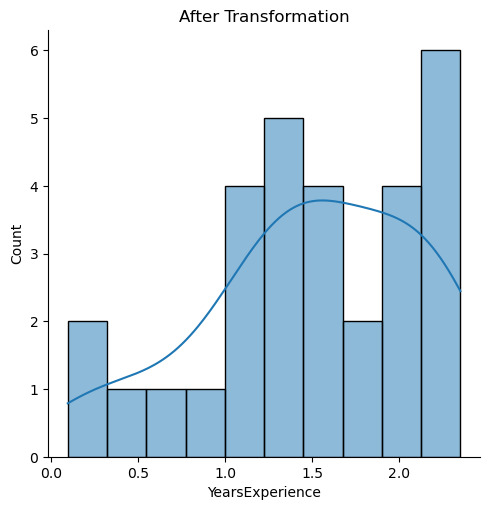

In [19]:
Labels=["Before Transformation","After Transformation"]
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

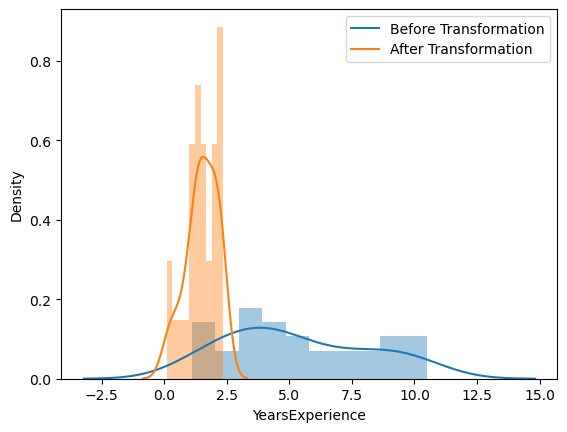

In [20]:

labels = ['Before Transformation','After Transformation']
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

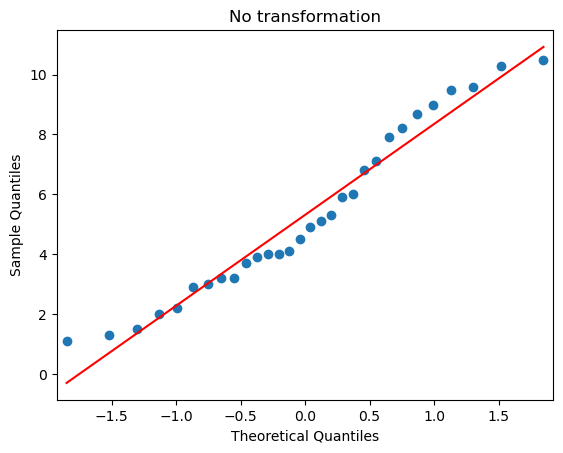

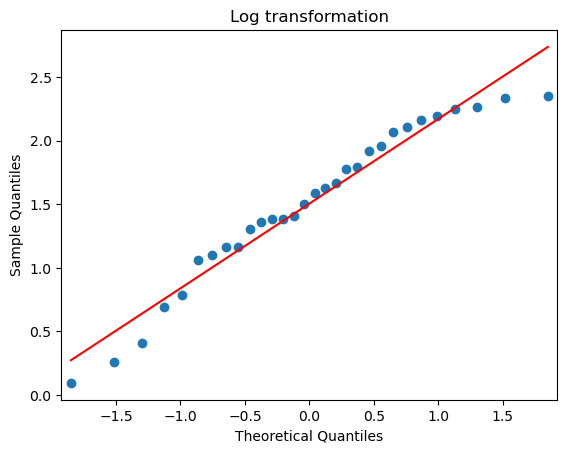

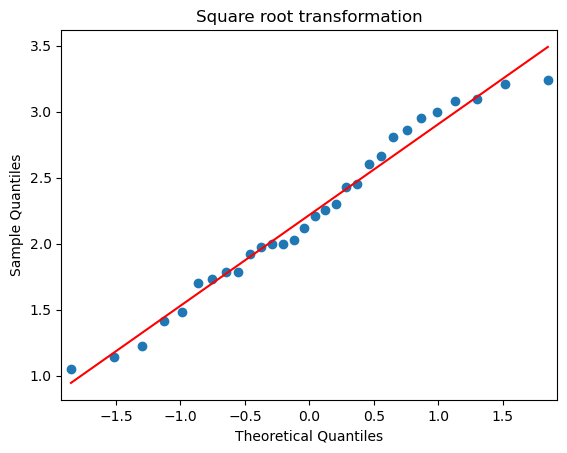

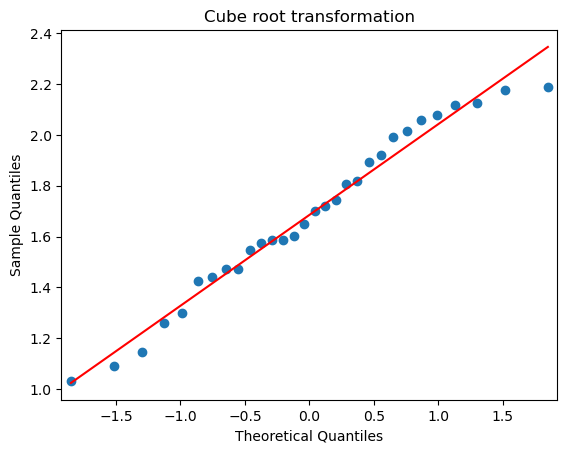

In [21]:
import statsmodels.api as smf
smf.qqplot(df['YearsExperience'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['YearsExperience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [22]:
import statsmodels.formula.api as sm
model = sm.ols('Salary~YearsExperience', data = df).fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        01:44:56   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           7.58e-19
Time:                        01:45:36   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:

model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           6.37e-18
Time:                        01:45:46   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           7.40e-16
Time:                        01:45:55   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
x=df[["YearsExperience"]]
y=df["Salary"]

In [28]:
from sklearn.linear_model import LinearRegression# for import linear Regression FFormula....
LR=LinearRegression()
LR.fit(x,y)

LinearRegression()

In [32]:
Intercept=LR.intercept_.round(3)

Years_Experience=(LR.coef_).round(3)

In [31]:
print(Intercept)

25792.2


In [33]:
Years_Experience=float(Years_Experience)
print(Years_Experience)

9449.962


In [34]:
model=LR.predict(x)

In [35]:
model

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [36]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y,model)
print("Mean Squared Error Will be : ",mse.round(3))
RSE=np.sqrt(mse).round(3)
print("Root Mean Squared Error Will be :",RSE.round(3))
print("R Square value will be :",r2_score(y,model).round(3))

Mean Squared Error Will be :  31270951.722
Root Mean Squared Error Will be : 5592.044
R Square value will be : 0.957


In [37]:
RSE

5592.044

In [38]:
from sklearn.metrics import mean_squared_error
model1_pred_y =np.square(model1.predict(df['YearsExperience']))
model2_pred_y =pow(model2.predict(df['YearsExperience']),3)
model3_pred_y =np.exp(model3.predict(df['YearsExperience']))

In [39]:
from sklearn.metrics import mean_squared_error,r2_score
mse1=mean_squared_error(y,model1_pred_y)
print("Mean Squared Error Will be : ",mse1.round(3))
RSE1=np.sqrt(mse1).round(3)
print("Root Mean Squared Error Will be :",RSE1.round(3))
print("R Square value will be :",r2_score(y,model1_pred_y).round(3))

Mean Squared Error Will be :  35529313.805
Root Mean Squared Error Will be : 5960.647
R Square value will be : 0.951


In [40]:
from sklearn.metrics import mean_squared_error,r2_score
mse2=mean_squared_error(y,model2_pred_y)
print("Mean Squared Error Will be : ",mse2.round(3))
RSE2=np.sqrt(mse2).round(3)
print("Root Mean Squared Error Will be :",RSE2.round(3))
print("R Square value will be :",r2_score(y,model2_pred_y).round(3))

Mean Squared Error Will be :  38847988.507
Root Mean Squared Error Will be : 6232.815
R Square value will be : 0.947


In [41]:
from sklearn.metrics import mean_squared_error,r2_score
mse3=mean_squared_error(y,model3_pred_y)
print("Mean Squared Error Will be : ",mse3.round(3))
RSE3=np.sqrt(mse3).round(3)
print("Root Mean Squared Error Will be :",RSE3.round(3))
print("R Square value will be :",r2_score(y,model3_pred_y).round(3))

Mean Squared Error Will be :  52124313.19
Root Mean Squared Error Will be : 7219.717
R Square value will be : 0.928


In [42]:
rmse={'model': RSE, 'model1': RSE1, 'model2': RSE2, 'model3' : RSE3}
min(rmse,key=rmse.get)

'model'

In [43]:
# first model results without any transformation
predicted2 = pd.DataFrame()
predicted2['YearsExperience'] = df.YearsExperience
predicted2['Salary'] = df.Salary
predicted2['Predicted_Salary_Hike'] = pd.DataFrame(model)
predicted2

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


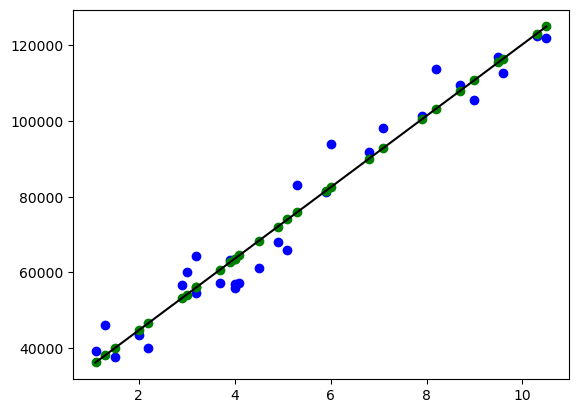

In [44]:
import matplotlib.pyplot as plt
plt.scatter(x=df["YearsExperience"],y=df["Salary"],color="blue")
plt.scatter(x=df["YearsExperience"],y=model,color="green")
plt.plot(df["YearsExperience"],model,color="black")
plt.show()

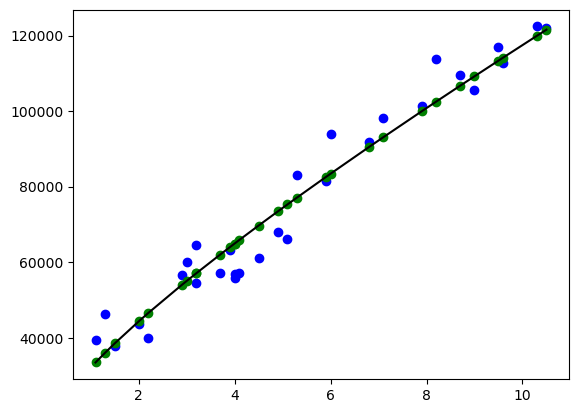

In [45]:
import matplotlib.pyplot as plt
plt.scatter(x=df["YearsExperience"],y=df["Salary"],color="blue")
plt.scatter(x=df["YearsExperience"],y=model1_pred_y,color="green")
plt.plot(df["YearsExperience"],model1_pred_y,color="black")
plt.show()

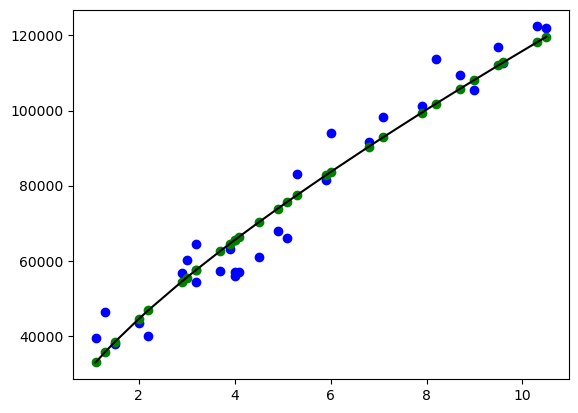

In [47]:
import matplotlib.pyplot as plt
plt.scatter(x=df["YearsExperience"],y=df["Salary"],color="blue")
plt.scatter(x=df["YearsExperience"],y=model2_pred_y,color="green")
plt.plot(df["YearsExperience"],model2_pred_y,color="black")
plt.show()

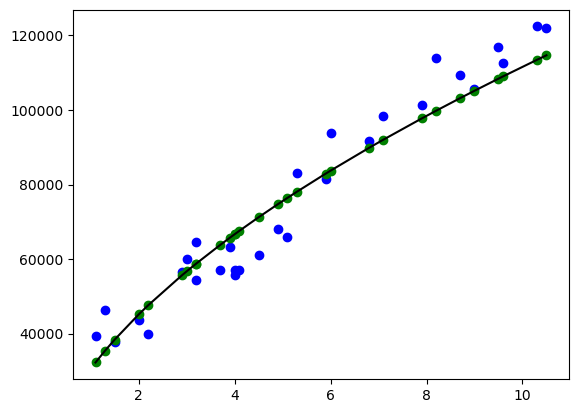

In [48]:
import matplotlib.pyplot as plt
plt.scatter(x=df["YearsExperience"],y=df["Salary"],color="blue")
plt.scatter(x=df["YearsExperience"],y=model3_pred_y,color="green")
plt.plot(df["YearsExperience"],model3_pred_y,color="black")
plt.show()